In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [2]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

def displayOne(array):
    """
    Display one image
    """

    plt.imshow(array[0].reshape(28, 28))
    plt.gray()
    plt.show()

In [4]:
(x, _), (y, _) = mnist.load_data()
im = Image.fromarray(x[2])
im.save("x.jpg")

In [10]:
zero = np.array(Image.open('../../data/zero.jpeg').convert('L'))

In [11]:
zero = preprocess(np.array([zero]))

In [ ]:
plt.imshow(zero[0].reshape(28, 28))
plt.gray()
plt.show()

In [ ]:
(train_data, _), (test_data, _) = mnist.load_data()

In [ ]:
train_data = preprocess(train_data)
test_data = preprocess(test_data)

In [ ]:
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

In [ ]:
display(train_data, noisy_train_data)

In [ ]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

In [38]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=5,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/5
469/469 [==============================] - 63s 133ms/step - loss: 0.1678 - val_loss: 0.1043
Epoch 2/5
469/469 [==============================] - 60s 127ms/step - loss: 0.1007 - val_loss: 0.0974
Epoch 3/5
469/469 [==============================] - 62s 132ms/step - loss: 0.0963 - val_loss: 0.0940
Epoch 4/5
469/469 [==============================] - 67s 142ms/step - loss: 0.0941 - val_loss: 0.0923
Epoch 5/5
469/469 [==============================] - 61s 130ms/step - loss: 0.0926 - val_loss: 0.0911


In [9]:
model = keras.models.load_model('../../data/training_data/number_epochs120')

In [8]:
predictions = model.predict(noisy_test_data)
display(noisy_test_data, predictions)

NameError: name 'noisy_test_data' is not defined

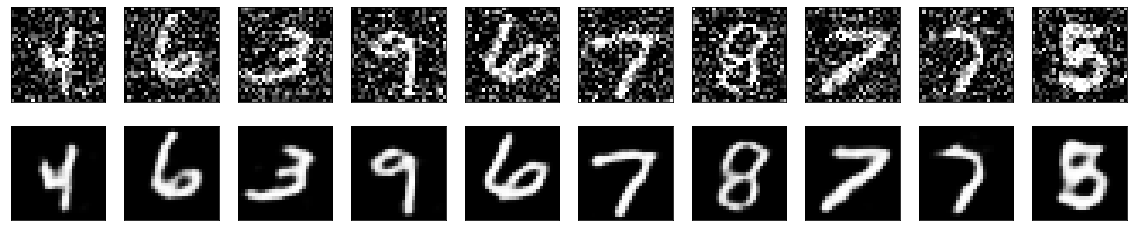

In [40]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

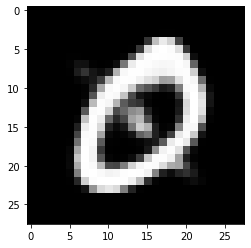

In [12]:
predictions = model.predict(zero)
displayOne(predictions)

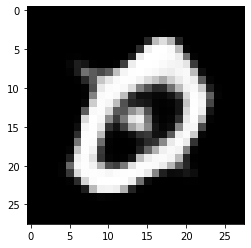

In [42]:
predictions = autoencoder.predict(zero)
displayOne(predictions)